In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ashish.Sam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
df1 = pd.read_csv("C:\\DS\\Email\\spam.csv", encoding='ISO-8859-1')

In [6]:
df1.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
3,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
4,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN


In [8]:
df1['v2'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [9]:
df1.shape

(5569, 5)

In [10]:
df1.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [11]:
#renaming the columns

df2=df1.rename(columns={'v2':'Text', 'v1':'Target'})
df2

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...
...,...,...
5564,spam,This is the 2nd time we have tried 2 contact u...
5565,ham,Will Ì_ b going to esplanade fr home?
5566,ham,"Pity, * was in mood for that. So...any other s..."
5567,ham,The guy did some bitching but I acted like i'd...


In [12]:
#missing values
df2.isnull().sum()

Target    0
Text      0
dtype: int64

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5569 entries, 0 to 5568
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Target  5569 non-null   object
 1   Text    5569 non-null   object
dtypes: object(2)
memory usage: 87.1+ KB


In [14]:
df2.describe()

,Target,Text
count,5569,5569
unique,2,5168
top,ham,"Sorry, I'll call later"
freq,4825,30


### Data Analysis

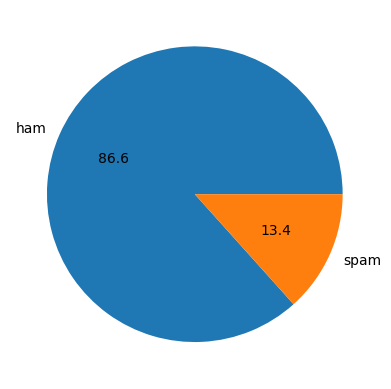

In [18]:
plt.pie(df2['Target'].value_counts(),labels=['ham','spam'],autopct="%0.1f")
plt.show()

### Data preprocessing

In [19]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(df2)):
    review = re.sub('[^a-zA-Z]', ' ', df2['Text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [20]:
corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breather promis wont take help grant fulfil promis wonder bless time',
 'date sunday',
 'xxxmobilemovieclub use credit click wap link next txt messag click http wap xxxmobilemovieclub com n qjkgighjjgcbl',
 '

In [21]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()

y=pd.get_dummies(df2['Target'])
y=y.iloc[:,1].values

In [22]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [23]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

### Model Building

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=2)

In [25]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, roc_auc_score
from sklearn import metrics

In [26]:
gnb= GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

#### GaussianNB

In [27]:
gnb.fit(X_train,y_train)
y_pred_GNB = gnb.predict(X_test)
roc=roc_auc_score(y_test, y_pred_GNB)
acc = accuracy_score(y_test, y_pred_GNB)
prec = precision_score(y_test, y_pred_GNB, average='macro')
res = pd.DataFrame([['GaussianNB', acc,prec,roc]],
               columns = ['Model', 'Accuracy', 'Precision','ROC'])
res

,Model,Accuracy,Precision,ROC
0,GaussianNB,0.843806,0.718705,0.880742


<AxesSubplot:>

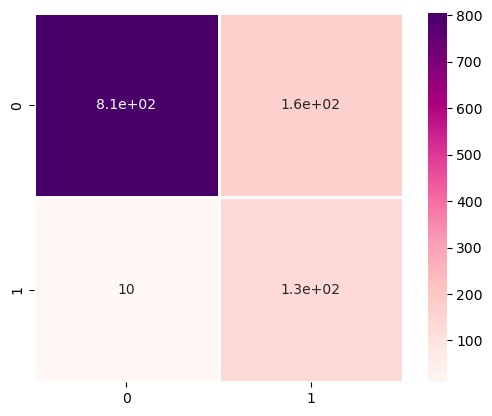

In [28]:
cm = metrics.confusion_matrix(y_test, y_pred_GNB)
sns.heatmap(cm,square=True, annot=True,linewidths=1,cmap="RdPu")

#### MultinomialNB

In [29]:
mnb.fit(X_train,y_train)
y_pred_MNB = mnb.predict(X_test)
roc=roc_auc_score(y_test, y_pred_MNB)
acc = accuracy_score(y_test, y_pred_MNB)
prec = precision_score(y_test, y_pred_MNB, average='macro')
res = pd.DataFrame([['GaussianNB', acc,prec,roc]],
               columns = ['Model', 'Accuracy', 'Precision','ROC'])
res

,Model,Accuracy,Precision,ROC
0,GaussianNB,0.985637,0.963111,0.974012


<AxesSubplot:>

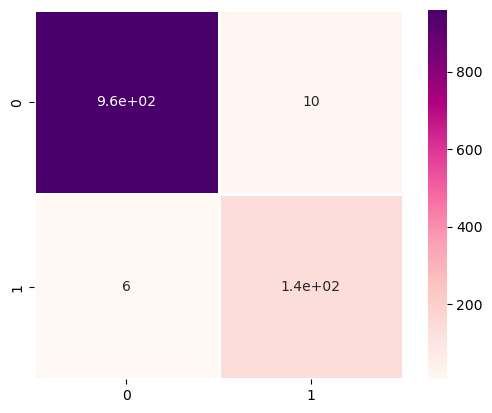

In [30]:
cm = metrics.confusion_matrix(y_test, y_pred_MNB)
sns.heatmap(cm,square=True, annot=True,linewidths=1,cmap="RdPu")

#### BernoulliNB

In [31]:
bnb.fit(X_train,y_train)
y_pred_BNB = bnb.predict(X_test)
roc=roc_auc_score(y_test, y_pred_BNB)
acc = accuracy_score(y_test, y_pred_BNB)
prec = precision_score(y_test, y_pred_BNB, average='macro')
res = pd.DataFrame([['GaussianNB', acc,prec,roc]],
               columns = ['Model', 'Accuracy', 'Precision','ROC'])
res

,Model,Accuracy,Precision,ROC
0,GaussianNB,0.991023,0.988655,0.971191


<AxesSubplot:>

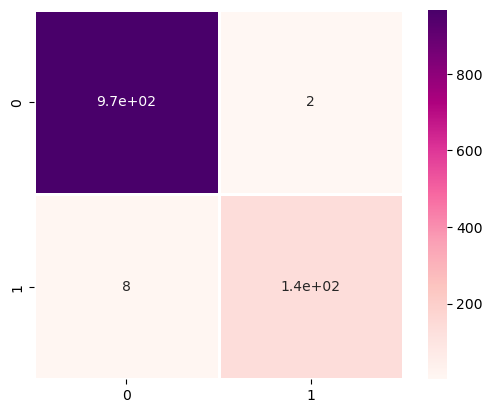

In [32]:
cm = metrics.confusion_matrix(y_test, y_pred_BNB)
sns.heatmap(cm,square=True, annot=True,linewidths=1,cmap="RdPu")

In [33]:
model = [gnb,mnb, bnb]
models=[y_pred_GNB,  y_pred_MNB, y_pred_BNB]
label=['GaussianNB','MultinomialNB','BernoulliNB']

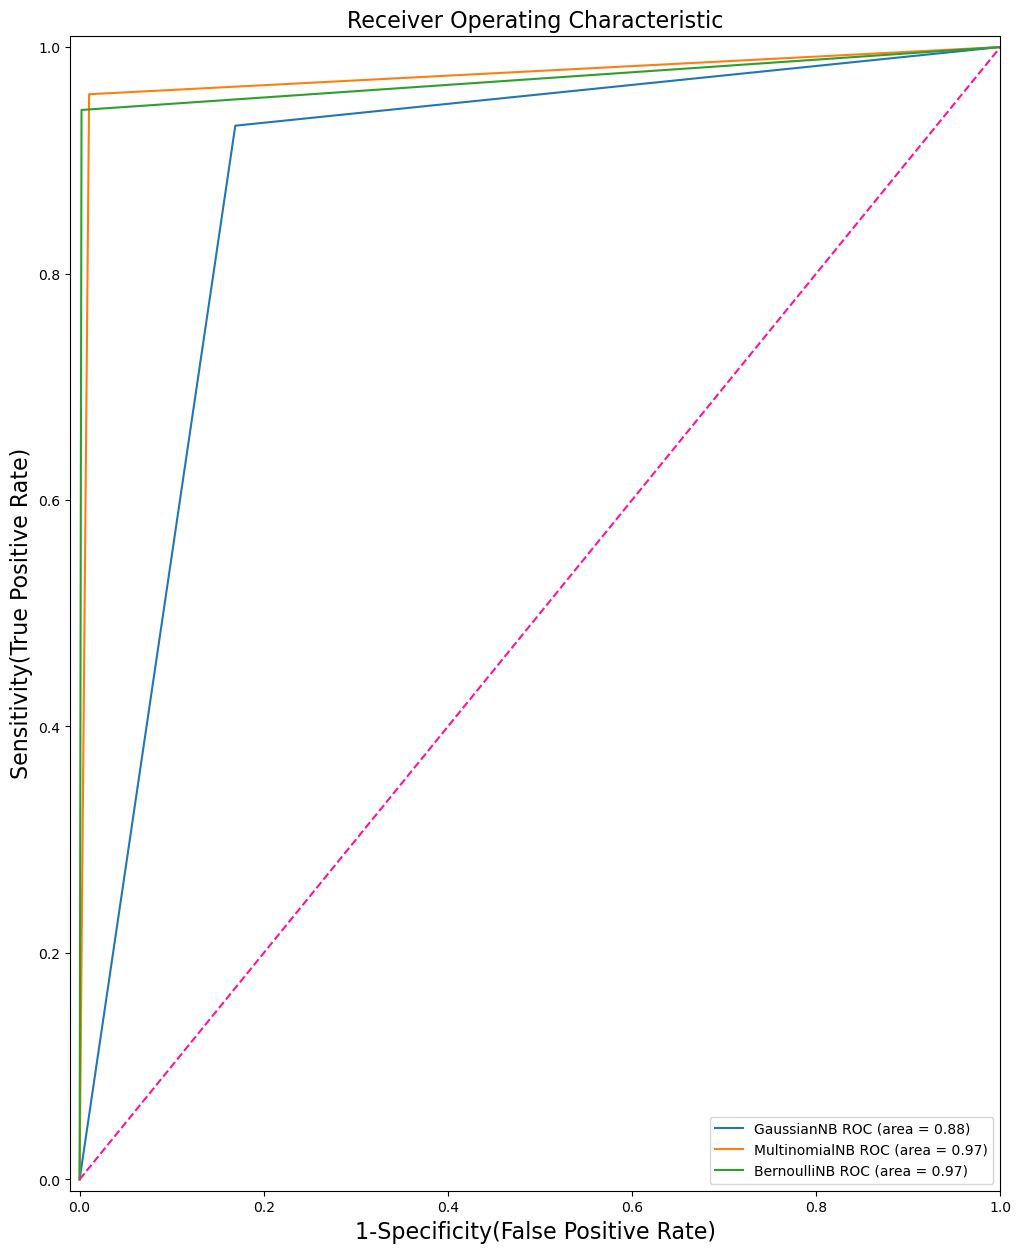

In [34]:
# plotting ROC curves
plt.figure(figsize=(12, 15))
m=np.arange(3)

for m in m:
    fpr, tpr,thresholds= metrics.roc_curve(y_test,models[m])
    auc = metrics.roc_auc_score(y_test,model[m].predict(X_test))
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (label[m], auc))
    
plt.plot([0, 1], [0, 1],color='deeppink',linestyle='--')
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])

plt.xlabel('1-Specificity(False Positive Rate)',fontsize=16)
plt.ylabel('Sensitivity(True Positive Rate)',fontsize=16)
plt.title('Receiver Operating Characteristic',fontsize=16)
plt.legend(loc="lower right")
plt.show()

#### BernoulliNB Nave Bias is the best performing model

In [36]:
import pickle
pickle.dump(cv,open("CVvectorizer.pkl","wb"))
pickle.dump(bnb,open("model.pkl","wb"))